In [ ]:
!pip install torch torchvision torchaudio

In [ ]:
import torch
import time
import matplotlib.pyplot as plt

In [ ]:

def matrix_multiplication(device, size):
    # Create random matrices
    A = torch.rand(size, size, device=device)
    B = torch.rand(size, size, device=device)

    # Measure start time
    start_time = time.time()
    C = torch.mm(A, B)

    end_time = time.time()
    return end_time - start_time

In [ ]:

# Sizes of matrices to test
matrix_sizes = [100, 500, 1000, 2000, 3000, 4000, 5000,10000,20000]

# Lists to store results
cpu_times = []


# Test on CPU
print("Testing on CPU...")
for size in matrix_sizes:
    time_taken = matrix_multiplication(device='cpu', size=size)
    cpu_times.append(time_taken)
    print(f"Matrix Size {size}x{size} on CPU: {time_taken:.4f} seconds")




Testing on CPU...
Matrix Size 100x100 on CPU: 0.0002 seconds
Matrix Size 500x500 on CPU: 0.0025 seconds
Matrix Size 1000x1000 on CPU: 0.0187 seconds
Matrix Size 2000x2000 on CPU: 0.1527 seconds
Matrix Size 3000x3000 on CPU: 0.7347 seconds
Matrix Size 4000x4000 on CPU: 2.6599 seconds
Matrix Size 5000x5000 on CPU: 3.8251 seconds
Matrix Size 10000x10000 on CPU: 16.3859 seconds
Matrix Size 20000x20000 on CPU: 129.6678 seconds


In [ ]:
# Test on GPU if available
gpu_times = []
if torch.cuda.is_available():
    device_index = torch.cuda.current_device()
    # Print the name of the GPU
    gpu_name = torch.cuda.get_device_name(device_index)
    print(f"GPU Device Name: {gpu_name}")
    print("\nTesting on GPU...")
    for size in matrix_sizes:
        time_taken = matrix_multiplication(device='cuda', size=size)
        gpu_times.append(time_taken)
        print(f"Matrix Size {size}x{size} on GPU: {time_taken:.4f} seconds")
else:
    print("\nGPU not available. Skipping GPU tests.")
    gpu_times = [None] * len(matrix_sizes)


GPU Device Name: Tesla T4

Testing on GPU...
Matrix Size 100x100 on GPU: 0.0001 seconds
Matrix Size 500x500 on GPU: 0.0001 seconds
Matrix Size 1000x1000 on GPU: 0.0001 seconds
Matrix Size 2000x2000 on GPU: 0.0001 seconds
Matrix Size 3000x3000 on GPU: 0.0001 seconds
Matrix Size 4000x4000 on GPU: 0.0000 seconds
Matrix Size 5000x5000 on GPU: 0.0000 seconds
Matrix Size 10000x10000 on GPU: 0.0001 seconds
Matrix Size 20000x20000 on GPU: 0.0023 seconds


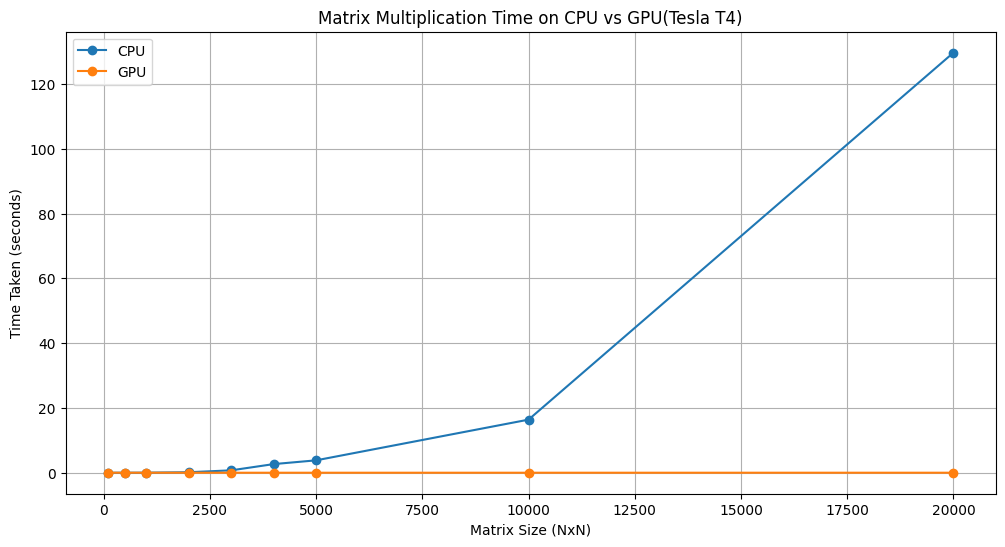

In [ ]:
# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(matrix_sizes, cpu_times, marker='o', label='CPU')
if gpu_times[0] is not None:
    plt.plot(matrix_sizes, gpu_times, marker='o', label='GPU')
plt.xlabel('Matrix Size (NxN)')
plt.ylabel('Time Taken (seconds)')
plt.title('Matrix Multiplication Time on CPU vs GPU(Tesla T4)')
plt.grid(True)
plt.legend()
plt.show()


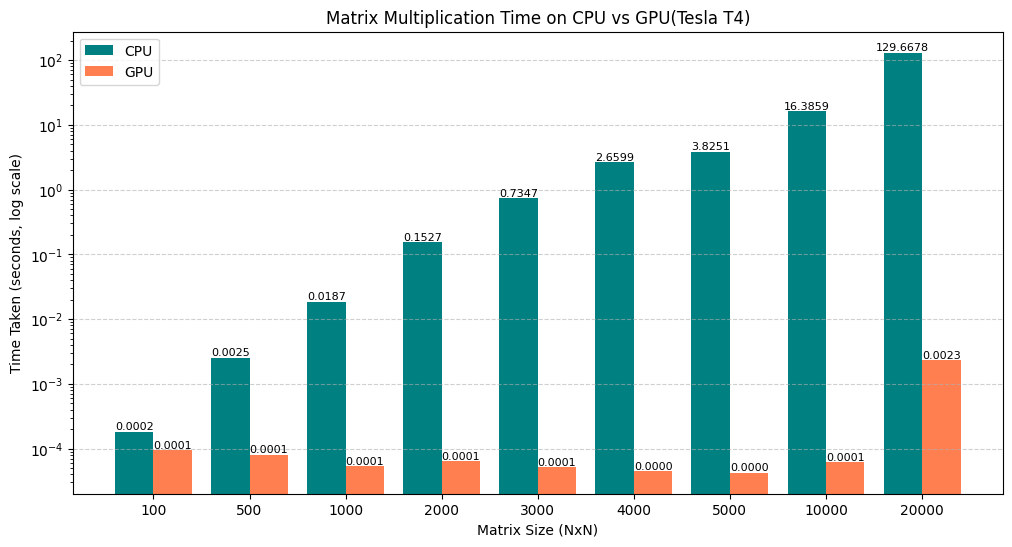

In [ ]:
# Preparing bar plot data
x = list(range(len(matrix_sizes)))
width = 0.4  # Width of the bars

# Plotting the results side by side with log scale
plt.figure(figsize=(12, 6))
plt.bar(x, cpu_times, width, label='CPU', color='#008080', align='center')  # Teal color for CPU
if gpu_times[0] is not None:
    plt.bar([i + width for i in x], gpu_times, width, label='GPU', color='#FF7F50', align='center')  # Coral color for GPU

# Add value annotations for better visibility
for i, v in enumerate(cpu_times):
    plt.text(i, v, f"{v:.4f}", ha='center', va='bottom', fontsize=8)
if gpu_times[0] is not None:
    for i, v in enumerate(gpu_times):
        plt.text(i + width, v, f"{v:.4f}", ha='center', va='bottom', fontsize=8)

plt.yscale('log')  # Use logarithmic scale to better compare small and large values
plt.xlabel('Matrix Size (NxN)')
plt.ylabel('Time Taken (seconds, log scale)')
plt.title('Matrix Multiplication Time on CPU vs GPU(Tesla T4)')
plt.xticks([i + width/2 for i in x], [str(size) for size in matrix_sizes])
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.legend()
plt.show()